In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Parameters for Mean-Reverting Model (Ornstein-Uhlenbeck Process)
X0 = 100  # Initial value
mu = 100  # Long-run mean
kappa = 0.3  # Mean reversion speed
sigma = 2  # Volatility

In [8]:
# Simulate Mean-Reverting Process
X_mr = np.zeros(N)
X_mr[0] = X0
W_mr = np.random.randn(N) * np.sqrt(dt)
for t in range(1, N):
    X_mr[t] = X_mr[t-1] + kappa * (mu - X_mr[t-1]) * dt + sigma * W_mr[t]

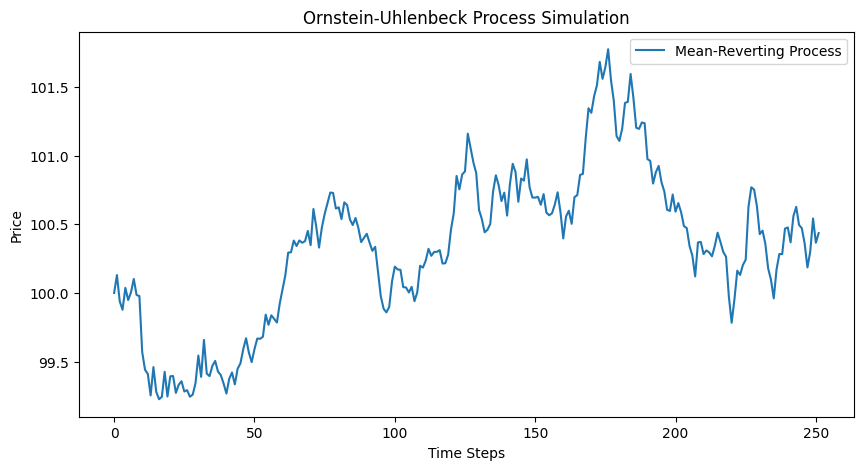

In [9]:
# Plot Mean-Reverting Process
plt.figure(figsize=(10, 5))
plt.plot(X_mr, label='Mean-Reverting Process')
plt.title('Ornstein-Uhlenbeck Process Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()